<a href="https://colab.research.google.com/github/daniloldn/applied-data-science-/blob/main/WDSSxRAG_First_Dates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pandas and numpy; data manipulation
import pandas as pd
import numpy as np

# matplotlib; data visualisation
from matplotlib import pyplot as plt

# Google colab; file import
# from google.colab import files
# from google.colab import drive

# Import necessary library to authorize access to Google Sheet
# from google.colab import auth
# import gspread
# from google.auth import default

In [ ]:
# Authenticating to google
# auth.authenticate_user()
# creds, _ = default()
# gc = gspread.authorize(creds)

In [ ]:
# Defining my worksheet
# worksheet = gc.open('Warwick RAG x WDSS (Responses)').sheet1
# Get_all_values gives a list of rows
# rows = worksheet.get_all_values()
# Convert to a DataFrame 
# df = pd.DataFrame(rows)
df = pd.read_csv("https://raw.githubusercontent.com/warwickdatasciencesociety/FirstDatesMatching/main/First%20Dates%20Sample%20Data.csv")
df.columns = df.columns.astype('int32')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,Timestamp,Name (Full Name),I identify as...,Which day would you prefer the date to be on?,I want to go on a...,I want a...,I am interested in...,I like to be adventurous.,I believe in true love.,I am confident.,...,Healthy living is important to me.,I believe actions speak louder than words.,I am passionate about talking about politics,It's important for my friends to share the sam...,I am more interested in STEM subjects than hum...,Email Address,Email ID,Student ID,Which year are you in?,I would like to go on a date with someone who ...
1,11/13/2022 18:00:00,a,Woman,"Wednesday, 23rd Nov",Friend Date,NaN,NaN,NaN,NaN,NaN,...,3,5,3,5,2,smth,smth,212121,NaN,NaN
2,11/13/2022 18:00:01,b,Woman,"Wednesday, 23rd Nov",Friend Date,NaN,NaN,NaN,NaN,NaN,...,5,4,5,4,1,smth,smth,212122,NaN,NaN
3,11/13/2022 18:00:02,c,Woman,"Wednesday, 23rd Nov",Friend Date,NaN,NaN,NaN,NaN,NaN,...,2,3,2,4,1,smth,smth,212123,NaN,NaN
4,11/13/2022 18:00:03,d,Man,Either,Friend Date,NaN,NaN,NaN,NaN,NaN,...,4,4,2,3,3,smth,smth,212124,NaN,NaN


In [ ]:
# TASK 1: Clean the dataset. (e.g. Convert standardize men to man, women to woman)

df.loc[df[6] == 'Men', 6] = 'Man'
df.loc[df[6] == 'Women', 6] = 'Woman'

In [ ]:
# Qualities which must match:
# Date day (index 3), type of date (index 4 and 5)

# Match to best accuracy:
# Romantic date questions, index 7 - 33
# Friend date questions, index 34 - 57
# If open to any year, just keep the year as numeric column like other attributes.
# If prefer own year, use try to partition into those of the same year.
df[6][0]

'I am interested in...'

In [ ]:
def get_gender_data(raw):
  # Check men and women number are equal for romantic dataframe
  print("Men looking for men:", raw.loc[((raw[2]=='Man') & (raw[6]=='Man'))].shape[0])
  print("Men looking for women:", raw.loc[((raw[2]=='Man') & (raw[6]=='Woman'))].shape[0])
  print("Women looking for women:", raw.loc[((raw[2]=='Woman') & (raw[6]=='Woman'))].shape[0])
  print("Women looking for men:", raw.loc[((raw[2]=='Woman') & (raw[6]=='Man'))].shape[0])

In [ ]:
# TASK 2: Partition the dataset here into the following dataframes based on the rules above.
# 
# Format: dataframe.loc[dataframe[column_index1]==some_value & dataframe[column_index2]==some_other_value, etc.]

rom_24_1on1 = df.loc[(df[3] == "Wednesday, 23rd Nov") 
                   & (df[4] == "Romantic Date")
                   & (df[5] == "One-on-one date")]

friend_24_1on1 = df.loc[(df[3] == "Wednesday, 23rd Nov") 
                   & (df[4] == "Friend Date")]

rom_24_1on1 = rom_24_1on1.drop([56,58,59], axis=0)
friend_24_1on1 = friend_24_1on1.drop([2], axis=0)
# Find the number of rows in the dataframe and indicate which are odd
print ("Number of rows:", friend_24_1on1.shape[0])

# Only for rom data
get_gender_data(rom_24_1on1)
#friend_24_1on1.head()

Number of rows: 10
Men looking for men: 2
Men looking for women: 5
Women looking for women: 0
Women looking for men: 5


In [ ]:
# For romantic date matching
def get_matching_rom_data(dataframe):
  dataframe = dataframe.dropna(how='any') # Drop empty rows
  dataframe = dataframe.sample(frac=1).reset_index(drop=True) # Randomly shuffle data
  for col in ([0,1,3,4,5] + list(range(34,63))):
    dataframe = dataframe.drop(col,axis=1)

  return dataframe
get_matching_rom_data(rom_24_1on1)

,2,6,7,8,9,10,11,12,13,14,...,24,25,26,27,28,29,30,31,32,33
0,Man,Man,4,4,4,2,5,3,4,4,...,5,5,4,2,4,2,4,4,5,2
1,Woman,Man,4,5,5,4,2,4,4,2,...,3,2,4,5,1,4,5,1,4,4
2,Man,Woman,4,4,4,4,4,4,3,4,...,3,3,4,3,3,3,3,1,3,4
3,Man,Woman,4,3,4,3,4,3,3,2,...,3,3,2,2,4,4,4,2,4,4
4,Woman,Man,3,4,4,4,4,3,2,1,...,1,4,2,3,4,2,5,1,5,4
5,Woman,Man,4,4,3,2,4,3,4,4,...,3,4,4,4,4,4,4,4,4,3
6,Man,Woman,5,4,4,4,1,3,4,2,...,4,5,4,2,5,4,5,1,4,3
7,Woman,Man,3,5,4,4,5,5,3,4,...,4,3,3,3,4,4,5,1,4,5
8,Man,Woman,4,4,4,3,5,2,3,2,...,5,5,3,2,4,5,5,1,4,5
9,Man,Man,3,3,2,4,3,1,1,3,...,2,3,3,2,3,3,5,4,4,3


In [ ]:
# For friend date matching
# Remove columns not relevant to the pair matching algorithm
def get_matching_friend_data(dataframe):
  dataframe = dataframe.dropna(how='any') # Drop empty rows
  dataframe = dataframe.sample(frac=1).reset_index(drop=True) # Randomly shuffle data
  for col in (list(range(0,34)) + [58,59,60,61,62]):
    dataframe = dataframe.drop(col,axis=1)

  return dataframe

In [ ]:
friend_data = get_matching_friend_data(df)
print("Number of people to match:",(friend_data.shape[0]))

# Check in sample below that there are no null values.

Number of people to match: 67


In [ ]:
# Distance between two points in some space
def get_dist(raw,a,b):
    return sum(pow(raw.iloc[a] - raw.iloc[b],2))

In [ ]:
# Scores performance of matching algorithm
def get_performance(raw,ls):
    output = []
    for pair in ls:
        output.append(get_dist(raw, pair[0], pair[1]))
    return output

In [ ]:
def BFPM_friend(raw):
    if (len(raw)%2==1):
        print("Odd number of people")
        return([])
    else:
        unmatched = list(range(0,raw.shape[0]))
        matched = []
        raw = raw.astype('int32')
        while (len(unmatched) > 0):
            Match_A = unmatched.pop(0) # Remove top row
            dist = 16*len(raw.columns) # Max distance
            for Match_Potential in unmatched:
                if (get_dist(raw, Match_A, Match_Potential) <= dist):
                    Match_B = Match_Potential
                    dist = get_dist(raw, Match_A, Match_Potential)
                    
            matched.append([Match_A, Match_B])
            unmatched.remove(Match_B)
          
        # Data visualisation
        BF = np.sqrt(np.divide(get_performance(raw,matched),len(raw))) 
        plt.hist(BF)
        plt.show()
        print("Mean = " + str(np.mean(BF)))
        print("Median = " + str(np.median(BF)))
        return(matched)

In [ ]:
def BFPM_rom(raw):
    if (len(raw)%2==1):
        print("Odd number of people")
        return([])
    else:
        match_data = raw.drop([2,6],axis=1).astype('int32') # Attribute to match on
        preference = raw[[2,6]] # Romantic preferences
        unmatched = list(range(0,raw.shape[0])) # Just contains the indices
        matched = []
        while (len(unmatched) > 0):
            Match_A = unmatched.pop(0) # Remove top index
            dist = 16*len(match_data.columns) # Max distance
            
            for Match_Potential in unmatched:
                if ( 
                    (get_dist(match_data, Match_A, Match_Potential) <= dist) 
                and (
                      (
                        (preference[6][Match_A] == preference[2][Match_Potential]) 
                        #or (preference[6][Match_A] == 'Everyone') 
                      )
                  and (
                        (preference[2][Match_A] == preference[6][Match_Potential]) 
                        #or (preference[6][Match_Potential] == 'Everyone')
                      )
                  )
                ):
                    Match_B = Match_Potential
                    dist = get_dist(match_data, Match_A, Match_Potential)
            matched.append([Match_A, Match_B])
            unmatched.remove(Match_B)
        
        # Data visualisation
        BF = np.sqrt(np.divide(get_performance(match_data,matched),len(match_data))) 
        plt.hist(BF)
        plt.show()
        print("Mean = " + str(np.mean(BF)))
        print("Median = " + str(np.median(BF)))

        return(matched)

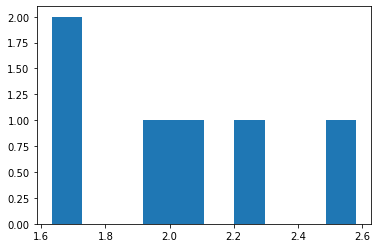

Mean = 2.028719372763207
Median = 2.040832999733066
[[0, 8], [1, 3], [2, 9], [4, 11], [5, 10], [6, 7]]


In [ ]:
def match_rom(raw):
  cleaned = get_matching_rom_data(raw)
  matches = BFPM_rom(cleaned)
  print(matches)
test_matches = match_rom(rom_24_1on1)

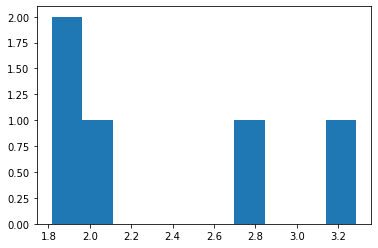

Mean = 2.352350786378739
Median = 2.04939015319192
[[0, 9], [1, 4], [2, 8], [3, 7], [5, 6]]


In [ ]:
def match_friend(raw):
  cleaned = get_matching_friend_data(raw)
  matches = BFPM_friend(cleaned)
  print(matches)
match_friend(friend_24_1on1)

In [ ]:
# Create dataframe of matches
result = pd.DataFrame(test_matches, columns = ['Match_1', 'Match_2'])
result.head()

,Match_1,Match_2


In [ ]:
test_matches